In [1]:
from src import espresso_machine as esma

In [2]:
#Step 1 - Initialize model
model = esma.project(project_id="B_striped") #Define project
model.set_cores(12) #Define number of prcessing cores
model.get_structure(format='poscar',path='Research/2D_Materials/Structure/',name='B_striped.poscar') #Load structure
model.set_pseudo(path='./Research/2D_Materials/PP')

In [3]:
model.ecutwfc(150) #Set wavefunction cutoff
model.ecutrho(600) #Set wavefunction cutoff
model.k_points([25,15,1]) #Set number of k points
model.degauss(0.02) #Set degauss value
model.conv_thr(1e-14) #Set convergence threshold
model.ph_thr(1e-18) #Set convergence threshold
model.smearing('fd')
model.etot_conv_thr(10**-9) 
model.forc_conv_thr(10**-8)

In [4]:
#Step 2 - Crystal optimization
model.calculate('vc-relax')

vc-relax for results is started
vc-relax for results is finished


In [5]:
#Step 4 - Scf calculation
model.get_structure('vc-relax') #Get relaxed strucutre
model.k_points([25,15,1]) #Set number of k points
model.calculate('relax')


relax for results is started
relax for results is finished


In [6]:
#Step 4 - Scf calculation
model.k_points([30,20,1]) #Set number of k points
for i in range(5):
    
    model.get_structure('relax') #Get relaxed strucutre
    model.calculate('relax')


relax for results is started
relax for results is finished
relax for results is started
relax for results is finished
relax for results is started
relax for results is finished
relax for results is started


In [ ]:
#Step 4 - Scf calculation
model.get_structure('relax') #Get relaxed strucutre
# model.k_points([25,15,1]) #Set number of k points
# model.calculate('scf')

In [ ]:
#Step 5 - Bands calculation
path = ['GAMMA','Y',"S","X","GAMMA"] #define corners
model.band_points(path,number=50) #define path
model.calculate('bands')

bands for results is started
bands for results is finished
bands-pp for results is started
bands-pp for results is finished


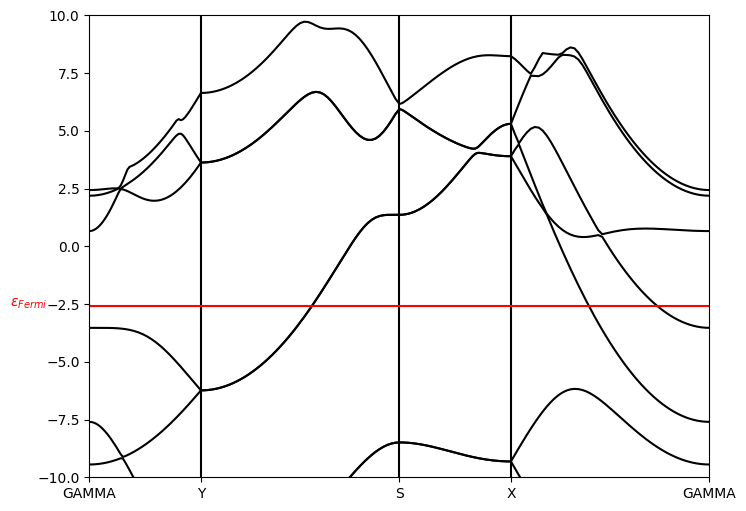

In [ ]:
#Step 6 - Plotting
model.plot('electron',ylim=[-10,10],save=True) #plot electron bands

In [ ]:
# Step 5 - Run ph.x
model.set_q(nq1=7,nq2=5,nq3=1) #Set parameters
model.calculate('ph')

ph for results is started


KeyboardInterrupt: 

In [ ]:
#Step- 2 - Run q2r.x
model.calculate('q2r') #Run calculation

In [ ]:
#Step 3 - Run matdyn.x
num_points = 200 # Number of q points
model.calculate("matdyn") #Run calculation

In [ ]:
#Step 4 - Plotting
model.plot('phonon',save=True) # Plot phonon band